In [8]:
import json

STATDIR = '../../stats/2025-01-01/'

with open(STATDIR+'q-count.json') as json_data:
    qf = json.load(json_data)

with open(STATDIR+'q-p-freq.json') as json_data:
    qpf = json.load(json_data)

with open(STATDIR+'prop-names.json') as pnmf :
    pname = json.load(pnmf)

with open(STATDIR+'p-count.json') as fpf :
    pf = json.load(fpf)

ff = []
ab = []
for q in qpf:
    ff.append(freq[q])
    ab.append(len(qpf[q]))
print(len(dd))

12205


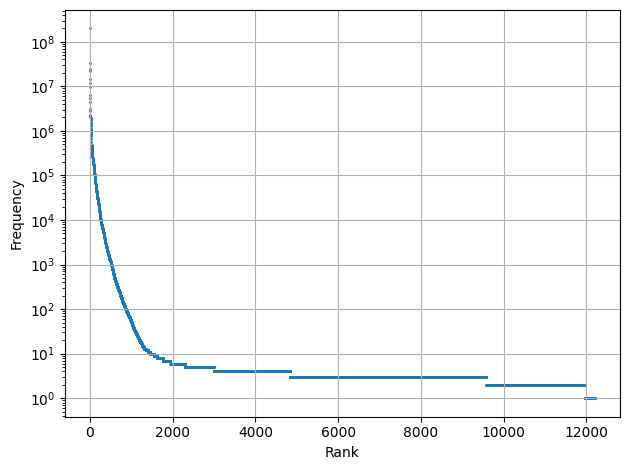

In [35]:
import matplotlib.pyplot as plt
import numpy as np

ffs = sorted(ff, reverse=True)
fig, ax = plt.subplots()

ax.scatter(range(len(ffs)), ffs, s=1)

ax.set_xlabel(r'Rank', fontsize=10)
ax.set_ylabel(r'Frequency', fontsize=10)
#ax.set_title('Diversity / Frequency Plot')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
fig.tight_layout()
plt.savefig('fig-freqs.pdf')
plt.show()

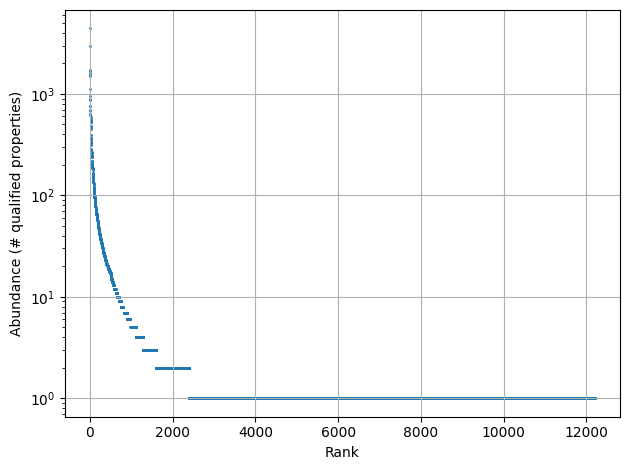

In [36]:
abs = sorted(ab, reverse=True)
fig, ax = plt.subplots()

ax.scatter(range(len(abs)), abs, s=1)

ax.set_xlabel(r'Rank', fontsize=10)
ax.set_ylabel(r'Abundance (# qualified properties)', fontsize=10)
#ax.set_title('Diversity / Frequency Plot')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
fig.tight_layout()
plt.savefig('fig-abundances.pdf')
plt.show()

12205


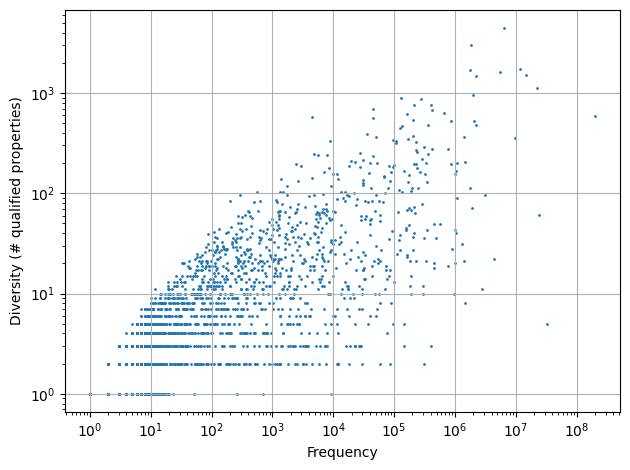

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

fig, ax = plt.subplots()
# ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

print(len(ff))
ax.scatter(ff, ab, s=1)

ax.set_xlabel(r'Frequency', fontsize=10)
ax.set_ylabel(r'Diversity (# qualified properties)', fontsize=10)
#ax.set_title('Diversity / Frequency Plot')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
fig.tight_layout()
plt.savefig('fig-freq-nbqprop.pdf')
plt.show()


In [16]:
import math

divsh = {}
divshn = {}
abundance = {}

for q in qpf:
    sq = sum(qpf[q].values())
    snq = 0
    for p in qpf[q]: 
        snq += qpf[q][p]/pf[p]
    shan = 0.0
    shanprop = 0.0
    sumtp = 0.0
    sumtpn = 0.0
    for p in qpf[q]: 
        tp = qpf[q][p]/sq
        shan +=  tp * math.log(tp)
        sumtp += tp
        tpn = qpf[q][p]/pf[p]/snq
        shanprop += tpn * math.log(tpn)
        sumtpn += tpn
    idx = math.exp(-shan)
    idxn = math.exp(-shanprop)
    divsh[q] = idx
    divshn[q] = idxn
    abundance[q] = len(qpf[q]) 

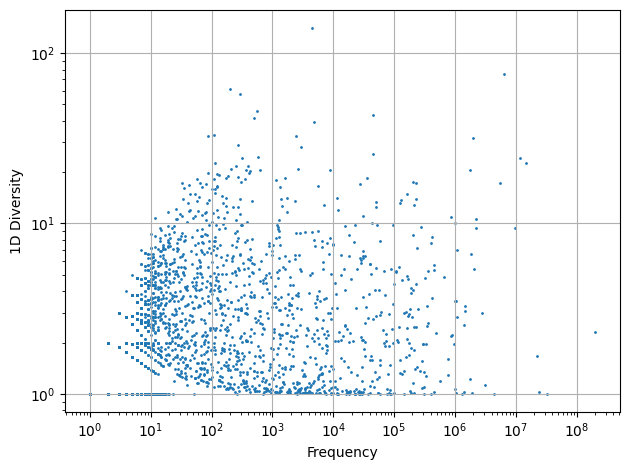

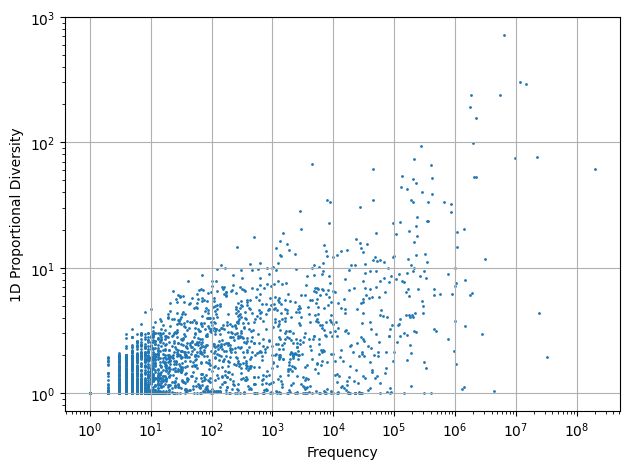

In [59]:
s1 = []
s2 = []
for q in qpf:
    s1.append(divsh[q])
    s2.append(divshn[q])
    
fig, ax = plt.subplots()
# ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)
ax.scatter(ff, s1, s=1)
ax.set_xlabel(r'Frequency', fontsize=10)
ax.set_ylabel(r'1D Diversity', fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
fig.tight_layout()
plt.savefig('fig-freq-1d.pdf')
plt.show()


fig, ax = plt.subplots()
# ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)
ax.scatter(ff, s2, s=1)

xx = [100,     100, 10000, 10000, 10000, 10**9, 10000, 10000, 10**9]
yy = [10**3,   5,   5,     10**3,     5,     5,     5,     1,     1] 
#ax.plot(xx, yy,color='red', linewidth=0.51)

# frontier: 10000**2 + 5**2

xx = [1, 1000]
yy = [1000, 1]
#ax.plot(xx, yy, color='green', linewidth=0.7)

# 300
xx = [1, 21600]
yy = [21600, 1]
#ax.plot(xx, yy, color='red', linewidth=0.7)
# 200
xx = [1, 80300]
yy = [80300, 1]
#ax.plot(xx, yy, color='green', linewidth=0.7)
# 100
xx = [1, 771000]
yy = [771000, 1]
#ax.plot(xx, yy, color='orange', linewidth=0.7)


ax.set_xlabel(r'Frequency', fontsize=10)
ax.set_ylabel(r'1D Proportional Diversity', fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
fig.tight_layout()
plt.savefig('fig-freq-1dp.pdf')
plt.show()

In [33]:
table = []
for p in qpf['P1545']:
    gfp = pf[p]
    f = qpf['P1545'][p]
    fp = f/gfp
    table.append((p, pname[p], gfp, f, fp))

stable = sorted(table, key=lambda x: -x[3])

for s in stable[0:15]:
    #print(s)
    print(f'        {s[0]} & {s[1]} & {s[2]} & {s[3]} & {s[4]:.3f} \\\\')

        P2093 & author name string & 148810279 & 148016553 & 0.995 \\
        P50 & author & 33552582 & 31769928 & 0.947 \\
        P2860 & cites work & 303125156 & 14782839 & 0.049 \\
        P5572 & expressed in & 1058470 & 1056827 & 0.998 \\
        P179 & part of the series & 1003261 & 745181 & 0.743 \\
        P735 & given name & 7901359 & 740208 & 0.094 \\
        P527 & has part(s) & 2405547 & 352471 & 0.147 \\
        P793 & significant event & 1129126 & 210618 & 0.187 \\
        P4908 & season & 172152 & 170292 & 0.989 \\
        P5753 & ideographic description sequence & 90169 & 90169 & 1.000 \\
        P361 & part of & 5104617 & 83606 & 0.016 \\
        P26 & spouse & 830942 & 79658 & 0.096 \\
        P734 & family name & 5346143 & 68640 & 0.013 \\
        P658 & tracklist & 53797 & 43554 & 0.810 \\
        P710 & participant & 860972 & 37559 & 0.044 \\


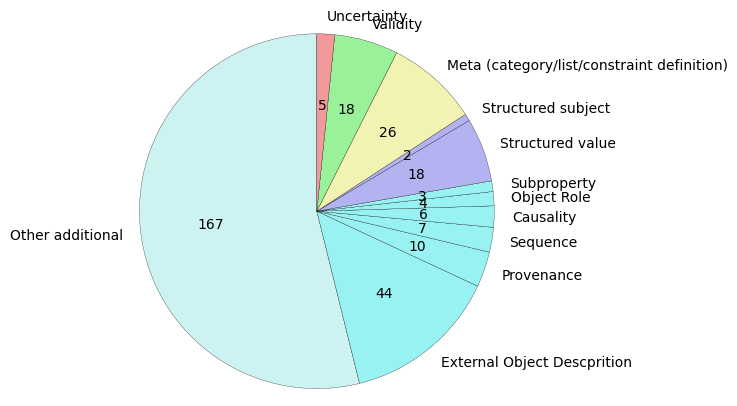

In [83]:
add_color = (0.6,0.95,0.95) # (0.85,0.85,0.85)

qual_by_cat_avg_div = [
 ('Other additional',167,6.74, (0.8,0.95,0.95))
,('External Object Descprition',44,15.49, add_color)
,('Provenance',10,99.07, add_color)
,('Sequence',7,14.46, add_color)
,('Causality',6,16.21, add_color)
,('Object Role',4,31.02, add_color)
,('Subproperty',3,20.92, add_color)
,('Structured value',18,8.54, (0.7,0.7,0.95))
,('Structured subject',2,7.88, (0.7,0.7,0.95))
,('Meta (category/list/constraint definition)',26,7.33, (0.95,0.95,0.7))
,('Validity',18,62.12, (0.6,0.95,0.6))
,('Uncertainty',5,35.49, (0.95,0.6,0.6))]

labels = list(map(lambda x : x[0], qual_by_cat_avg_div))

#labels = ['Validity','Struct Value','Struct subject','Meta','Uncertainty','Ext Obj Desc','Provenance','Sequence','Causality','Obj Role','Subproperty','Other Additional']

# sizes = [18 ,18 , 2, 26, 5, 44, 10, 7, 6, 4, 3, 167]

sizes = list(map(lambda x : x[1], qual_by_cat_avg_div))

colors = [(0.4, 0.6, 1), 'yellow', 'green', 'orange', 'violet', (1,0,0), (1,0.1, 0.1), (1, 0.2,0.2), (1,0.3,0.3), (1,0.4, 0.4), (1, 0.5,0.5),(1,0.6,0.6)]

colors = [(0.9,0.9,0.9), (0.7,0.7,0.7),(0.7,0.7,0.7), (0.6,0.6,0.6), (0.9,0.9,0.9), (0.7,0.7,0.7), (0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5)]

colors = [(0.6,0.95,0.6), (0.7,0.7,0.95),(0.7,0.7,0.95), (0.95,0.6,0.6), (0.95,0.95,0.7)] + [(0.7,0.95,0.95) for x in range(7)]

colors = list(map(lambda x : x[3], qual_by_cat_avg_div))

def pctf(p): 
    return round(p/100*sum(sizes))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=pctf, colors=colors, wedgeprops = {'linewidth': 0.2, 'linestyle': '-', 'edgecolor': 'black'}, #autopct='%1.1f%%',
  radius=1.2, startangle=90)

plt.savefig('figure1.pdf')
plt.show()